breakthrough-wb-Denmark_England-0:07:22-Exp-ground-truth.csv
ranked-breakthrough-wb-Denmark_England-0:07:22-Linear-ground-truth.csv
breakthrough-wb-Denmark_England-0:07:22-Linear-ground-truth.csv
breakthrough-wb-Denmark_England-0:07:22-Inverse-for-ordering-truth.csv
breakthrough-wb-Denmark_England-0:07:22-Linear-for-ordering-truth.csv
ranked-breakthrough-wb-Denmark_England-0:07:22-Inverse-ground-truth.csv
ranked-breakthrough-wb-Denmark_England-0:07:22-Exp-ground-truth.csv
breakthrough-wb-Denmark_England-0:07:22-Inverse-ground-truth.csv
breakthrough-wb-Denmark_England-0:07:22-Control-for-ordering-truth.csv
ranked-breakthrough-wb-Denmark_England-0:07:22-Control-ground-truth.csv
breakthrough-wb-Denmark_England-0:07:22-Exp-for-ordering-truth.csv
breakthrough-wb-Denmark_England-0:07:22-Control-ground-truth.csv
run-into-space-Denmark_England-0:43:37-Inverse-ground-truth.csv
run-into-space-Denmark_England-0:43:37-Inverse-for-ordering-truth.csv
run-into-space-Denmark_England-0:43:37-Exp-for-or

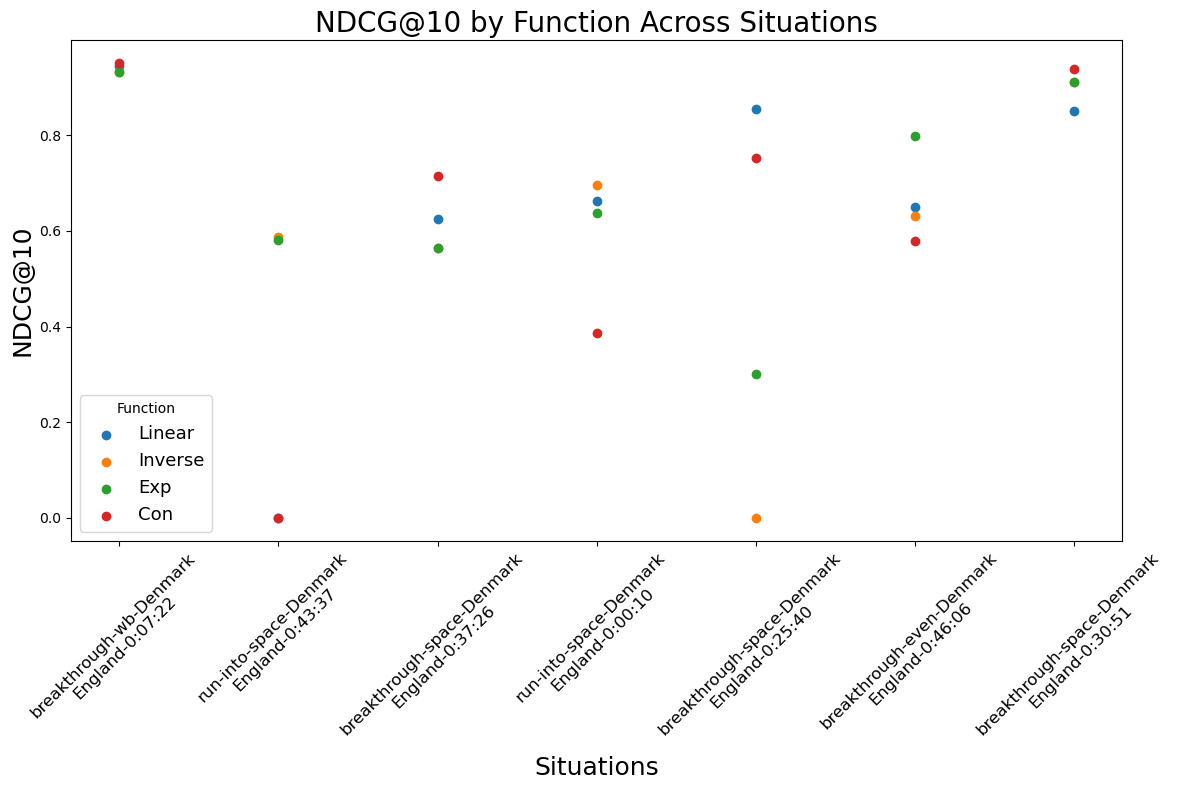

  Weighting Function   NDCG@10
0                Con  0.617767
1                Exp  0.674838
2            Inverse  0.617536
3             Linear  0.655809


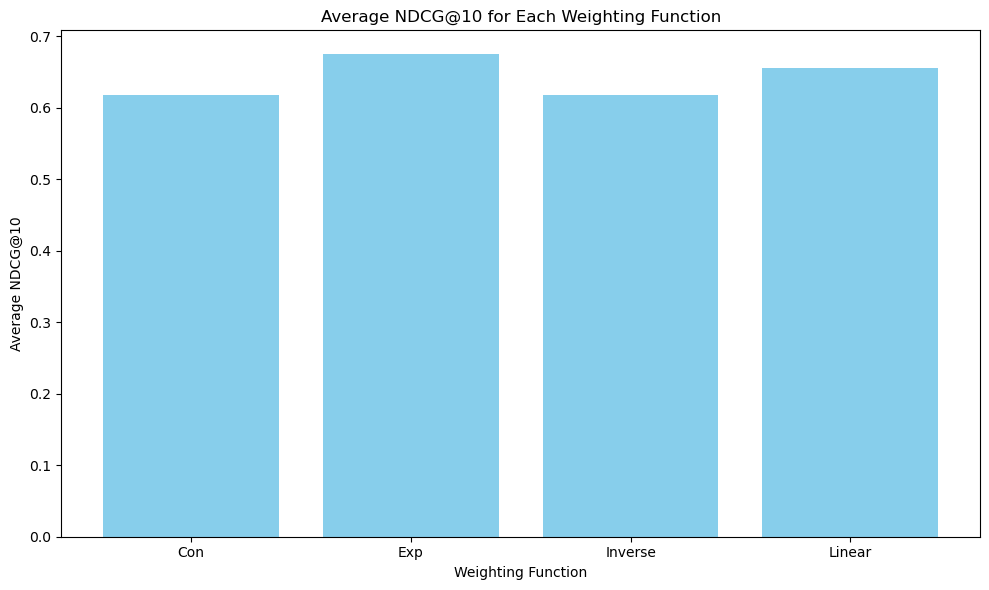

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Helper function to compute NDCG@K
def ndcg_at_k(ratings, k):
    """
    Calculate NDCG at K for a ranked list.
    :param ratings: List or array of relevance scores (e.g., [1, 0, 0, 1, 1]).
    :param k: Cutoff rank.
    :return: NDCG score at K.
    """
    ratings = np.asarray(ratings)[:k]
    dcg = np.sum(ratings / np.log2(np.arange(2, len(ratings) + 2)))
    ideal_ratings = np.sort(ratings)[::-1]
    idcg = np.sum(ideal_ratings / np.log2(np.arange(2, len(ideal_ratings) + 2)))
    return dcg / idcg if idcg > 0 else 0

# Helper function to extract weighting function from file name
def extract_weighting_function(file_name):
    
    
    if("Exp" in file_name):
        return "Exp"  # Assumes weighting function is the 3rd part of the file name
    
    if("Linear" in file_name):
        return "Linear"  # Assumes weighting function is the 3rd part of the file name
    
    if("Inverse" in file_name):
        return "Inverse"  # Assumes weighting function is the 3rd part of the file name
    

    if("Control" in file_name):
        return "Con"  # Assumes weighting function is the 3rd part of the file name






# Directory containing the CSV files
base_dir = "ranked_situations_martin"  # Replace with the actual path

# Placeholder for storing results
metrics = []

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    for file in files:
        print(file)
        file_for_key = "-".join(file.split("-")[1:-3])
        
        if "ranked" in file and file.endswith(".csv"):
            file_path = os.path.join(root, file)
            
            # Read the CSV file
            df = pd.read_csv(file_path)
            


            # Ensure there are enough rows
            if len(df) > 0:

                # Compute NDCG@10
                ndcg = ndcg_at_k(df["rating"].values, k=10)
                
                # Extract the weighting function from the file name
                weighting_function = extract_weighting_function(file)
                
                # Store the metric
                metrics.append({
                    "Folder": os.path.basename(root),
                    "File": ("\n".join(file_for_key.split("_"))),
                    "Weighting Function": weighting_function,
                    "NDCG@10": ndcg
                })


# Convert metrics into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the results
plt.figure(figsize=(12, 8))
for function in metrics_df["Weighting Function"].unique():
    function_data = metrics_df[metrics_df["Weighting Function"] == function]
    plt.scatter(
        function_data["File"], 
        function_data["NDCG@10"], 
        marker="o", 
        label=function
    )

plt.xticks(fontsize = 12)


plt.xlabel("Situations", fontsize = 18)
plt.ylabel("NDCG@10", fontsize = 18)
plt.title("NDCG@10 by Function Across Situations", fontsize=20)
plt.legend(title="Function", fontsize =13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compute average NDCG@10 for each weighting function
average_scores = metrics_df.groupby("Weighting Function")["NDCG@10"].mean().reset_index()
print(average_scores)

# Plot average NDCG@10 for each weighting function
plt.figure(figsize=(10, 6))
plt.bar(
    average_scores["Weighting Function"], 
    average_scores["NDCG@10"], 
    color="skyblue"
)
plt.xlabel("Weighting Function")
plt.ylabel("Average NDCG@10")
plt.title("Average NDCG@10 for Each Weighting Function")
plt.tight_layout()
plt.show()

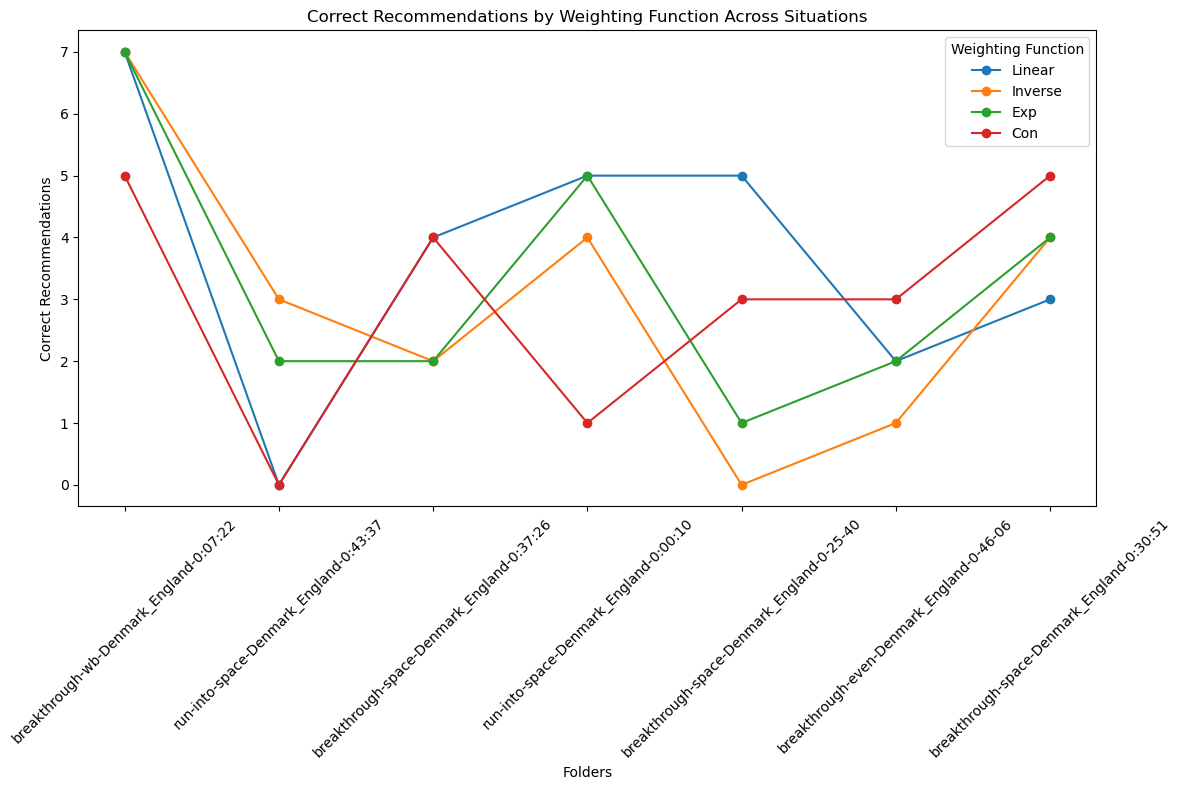

  Weighting Function  Correct Recommendations
0                Con                 3.000000
1                Exp                 3.285714
2            Inverse                 3.000000
3             Linear                 3.714286


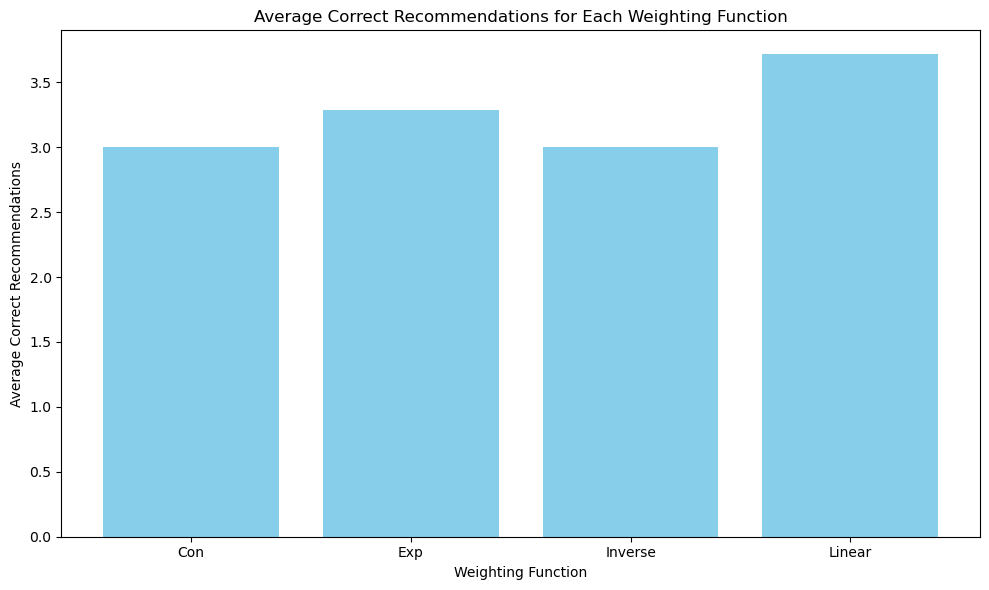

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Helper function to extract weighting function from file name
def extract_weighting_function(file_name):
    if "Exp" in file_name:
        return "Exp"
    if "Linear" in file_name:
        return "Linear"
    if "Inverse" in file_name:
        return "Inverse"
    if "Control" in file_name:
        return "Con"

# Directory containing the CSV files
base_dir = "ranked_situations_martin"  # Replace with the actual path

# Placeholder for storing results
metrics = []

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if "ranked" in file and file.endswith(".csv"):
            file_path = os.path.join(root, file)
            
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Ensure there are rows to process
            if len(df) > 0:
                
                # Count the number of correct recommendations (e.g., ratings > 0)
                correct_recommendations = (df["rating"] > 0).sum()
                
                # Extract the weighting function from the file name
                weighting_function = extract_weighting_function(file)
                
                # Store the metric
                metrics.append({
                    "Folder": os.path.basename(root),
                    "File": file,
                    "Weighting Function": weighting_function,
                    "Correct Recommendations": correct_recommendations
                })

# Convert metrics into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the results
plt.figure(figsize=(12, 8))
for function in metrics_df["Weighting Function"].unique():
    function_data = metrics_df[metrics_df["Weighting Function"] == function]
    plt.scatter(
        function_data["Folder"], 
        function_data["Correct Recommendations"], 
        marker="o", 
        label=function
    )

plt.xlabel("Folders")
plt.ylabel("Correct Recommendations")
plt.title("Correct Recommendations by Weighting Function Across Situations")
plt.legend(title="Weighting Function")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compute average number of correct recommendations for each weighting function
average_scores = metrics_df.groupby("Weighting Function")["Correct Recommendations"].mean().reset_index()
print(average_scores)

# Plot average correct recommendations for each weighting function
plt.figure(figsize=(10, 6))
plt.bar(
    average_scores["Weighting Function"], 
    average_scores["Correct Recommendations"], 
    color="skyblue"
)
plt.xlabel("Weighting Function")
plt.ylabel("Average Correct Recommendations")
plt.title("Average Correct Recommendations for Each Weighting Function")
plt.tight_layout()
plt.show()
